## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Alterando o código original para dar continuidade no exercicio
'''boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])'''

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
# Gerando a matriz de correlação
matriz_corr = boston.corr()

In [6]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [7]:
# Treinando duas árvores uma com profundidade 3 e 5
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [9]:
# Calculando o MSE.
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_2.predict(X_test))

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=3 é: 21,21
O MSE da árvore com profundidade=5 é: 23,48


In [10]:
# Verificando o R-quadrado
# Realizando o teste de profundidade da arvore para 2 e 5
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [11]:
# r quadrado
r_quadrado1 = regr_1.score(X_train, y_train)
r_quadrado2 = regr_2.score(X_train, y_train)

template = "O r-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),r_quadrado1).replace(".",","))
print(template.format(regr_2.get_depth(),r_quadrado2).replace(".",","))

O r-quadrado da árvore com profundidade=3 é: 0,84
O r-quadrado da árvore com profundidade=5 é: 0,93


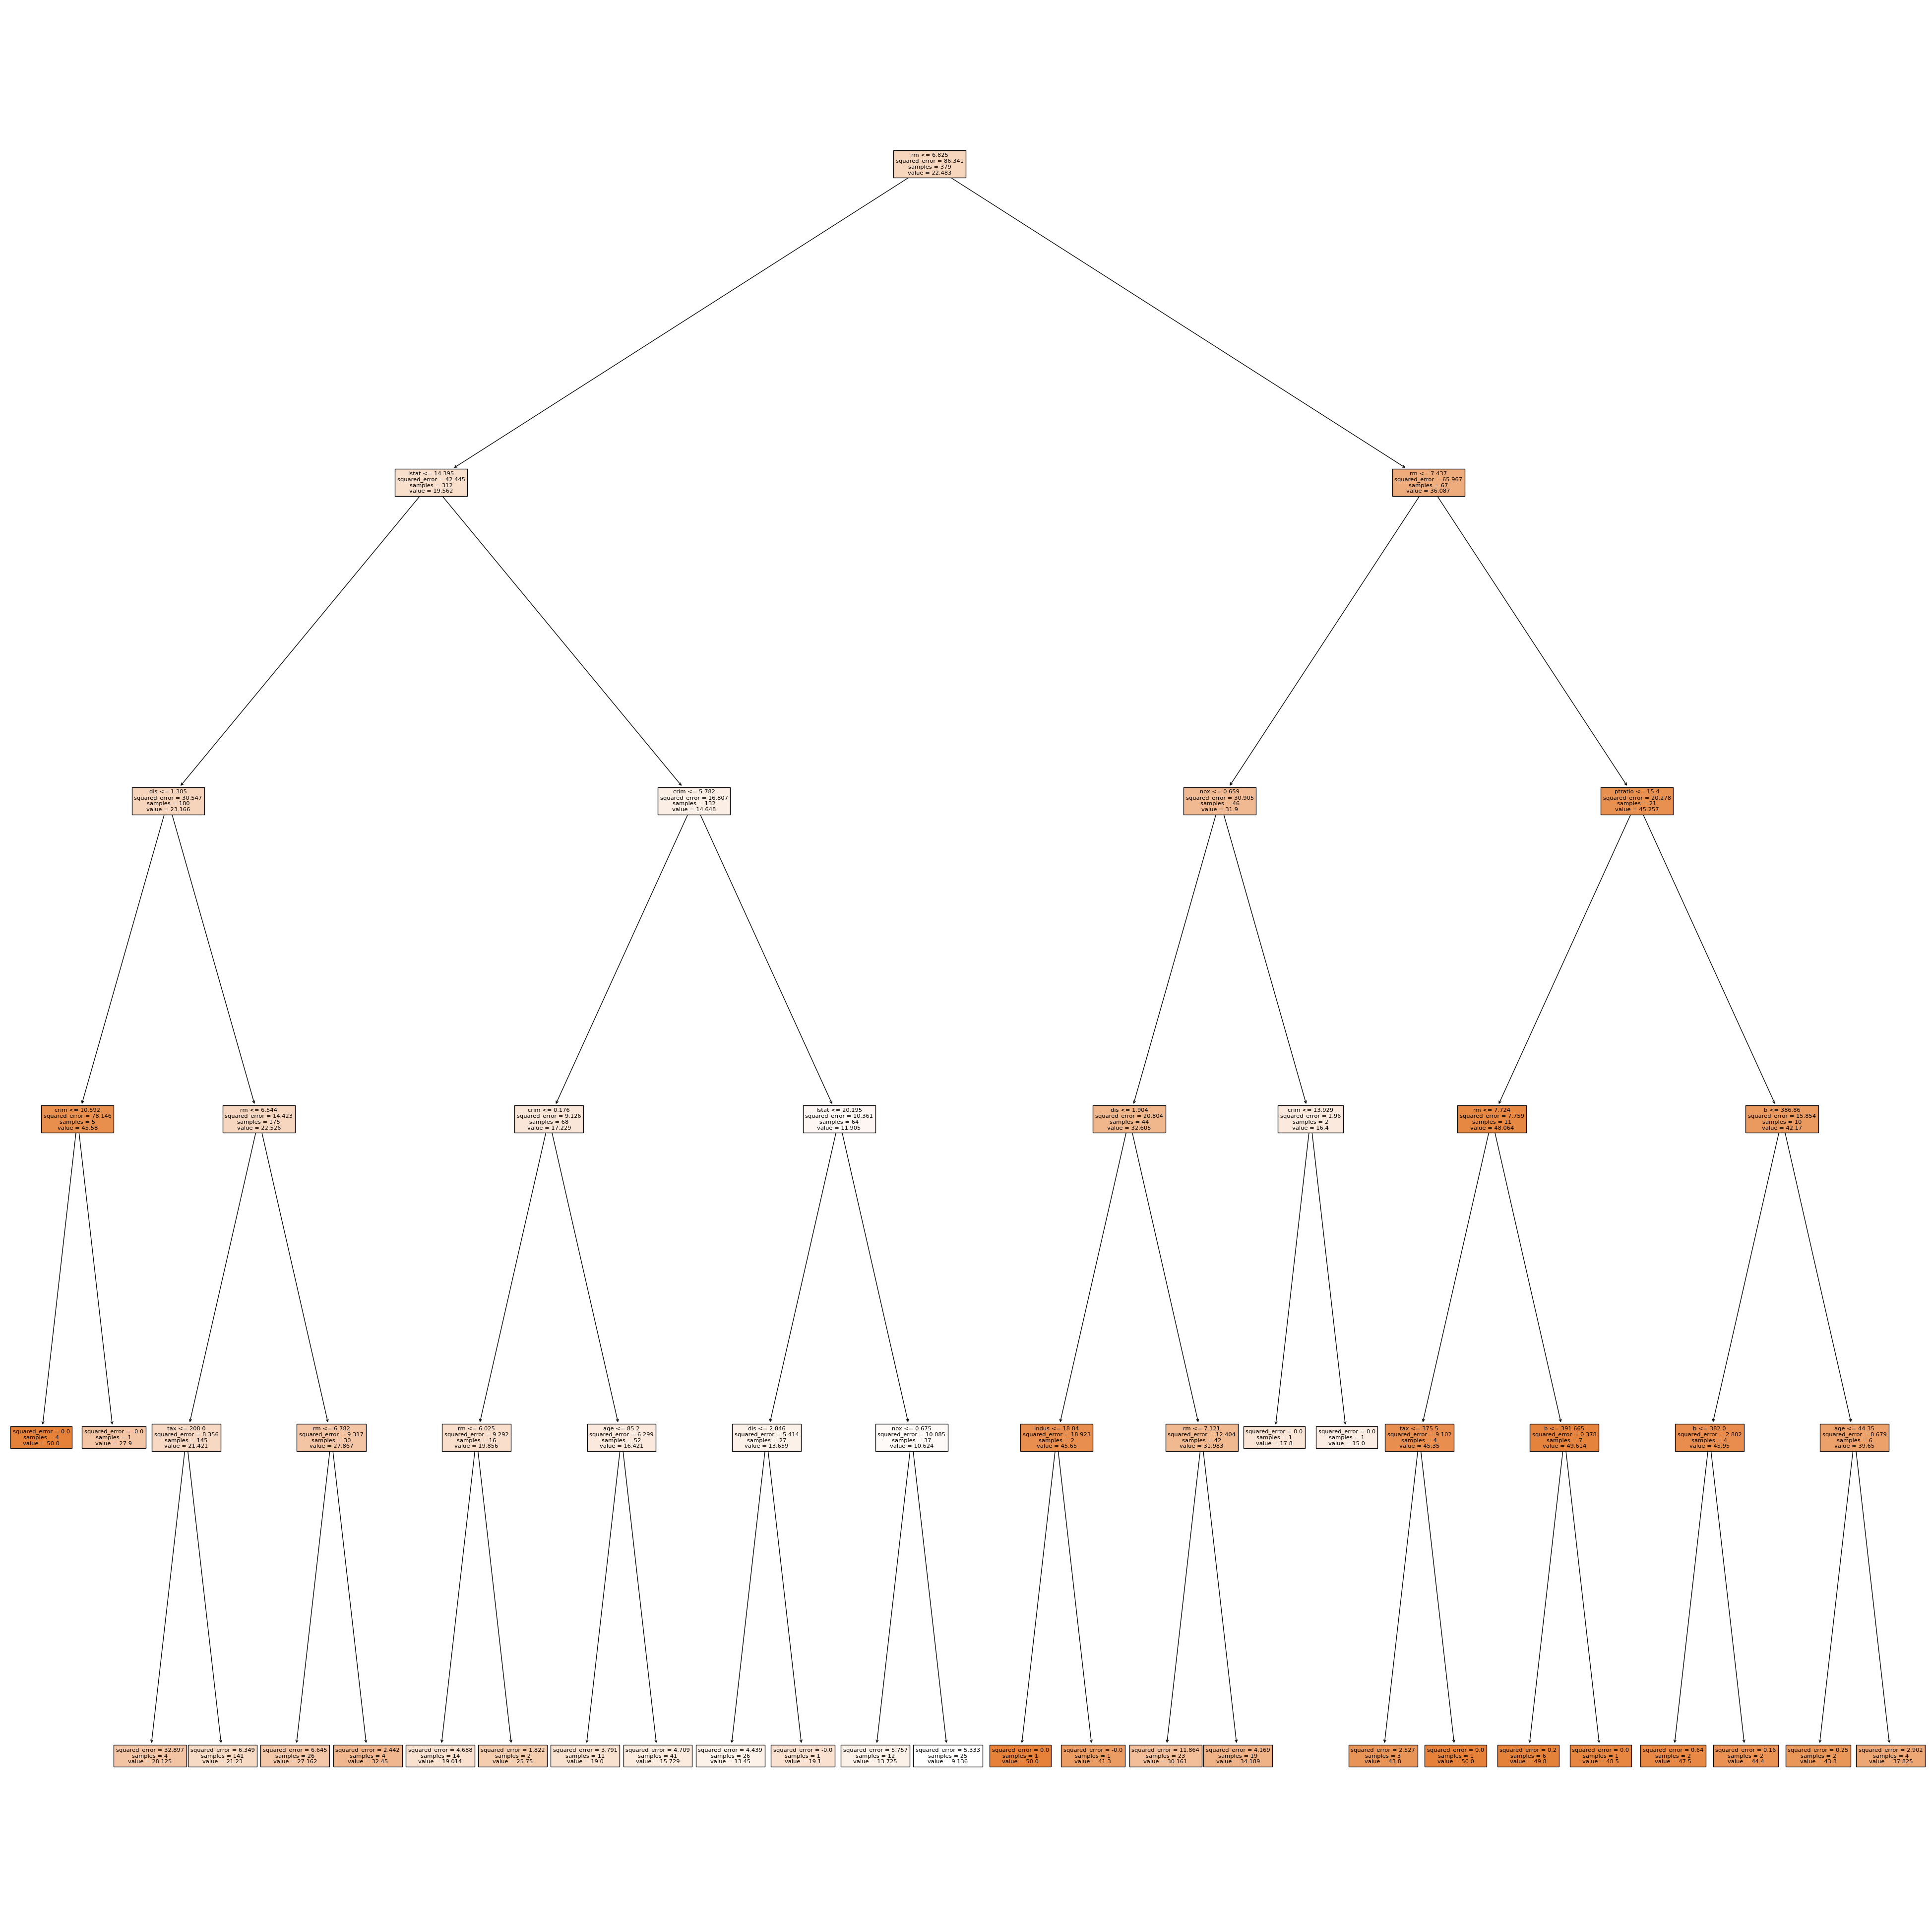

In [12]:
# Plotando a árvore com profundidade máxima = 5
plt.rc('figure', figsize=(50, 50))
tp = tree.plot_tree(regr_2,
                    feature_names=X.columns,
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [13]:
# CCP- alfa
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 3.82208820e-03, 1.03430079e-02, 2.53562005e-02,
        7.60686016e-02, 8.11086680e-02, 9.98548813e-02, 1.05455145e-01,
        1.22128979e-01, 2.09491378e-01, 2.44806999e-01, 2.51335092e-01,
        2.55818280e-01, 3.80936862e-01, 4.14938402e-01, 4.45555821e-01,
        4.80065895e-01, 4.87840543e-01, 9.40833133e-01, 1.03094459e+00,
        1.32543775e+00, 2.46643680e+00, 2.72514430e+00, 6.78719388e+00,
        6.81710024e+00, 1.45803196e+01, 3.97376086e+01]),
 'impurities': array([ 5.81997415,  5.82379624,  5.83413924,  5.85949544,  5.93556405,
         6.01667271,  6.1165276 ,  6.22198274,  6.34411172,  6.5536031 ,
         6.7984101 ,  7.04974519,  7.30556347,  7.68650033,  8.51637713,
         8.96193296,  9.44199885,  9.92983939, 10.87067253, 11.90161712,
        13.22705487, 15.69349167, 18.41863597, 25.20582985, 32.0229301 ,
        46.60324968, 86.34085825])}

Text(0, 0.5, 'Impureza total das folhas')

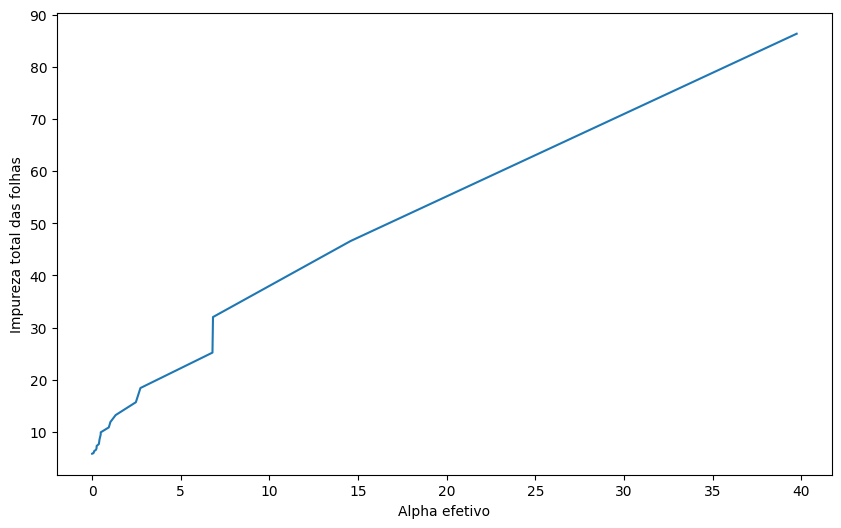

In [15]:
# Gráfico de impureza e de alfa
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [16]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

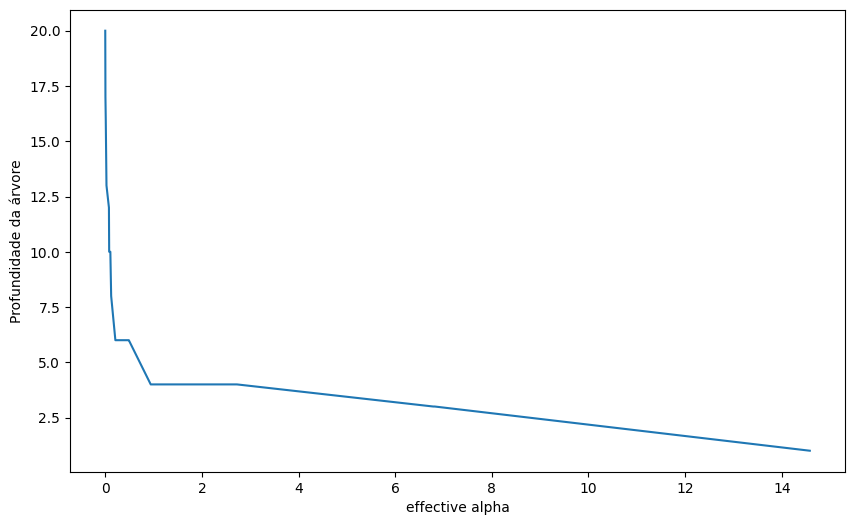

In [17]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [18]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

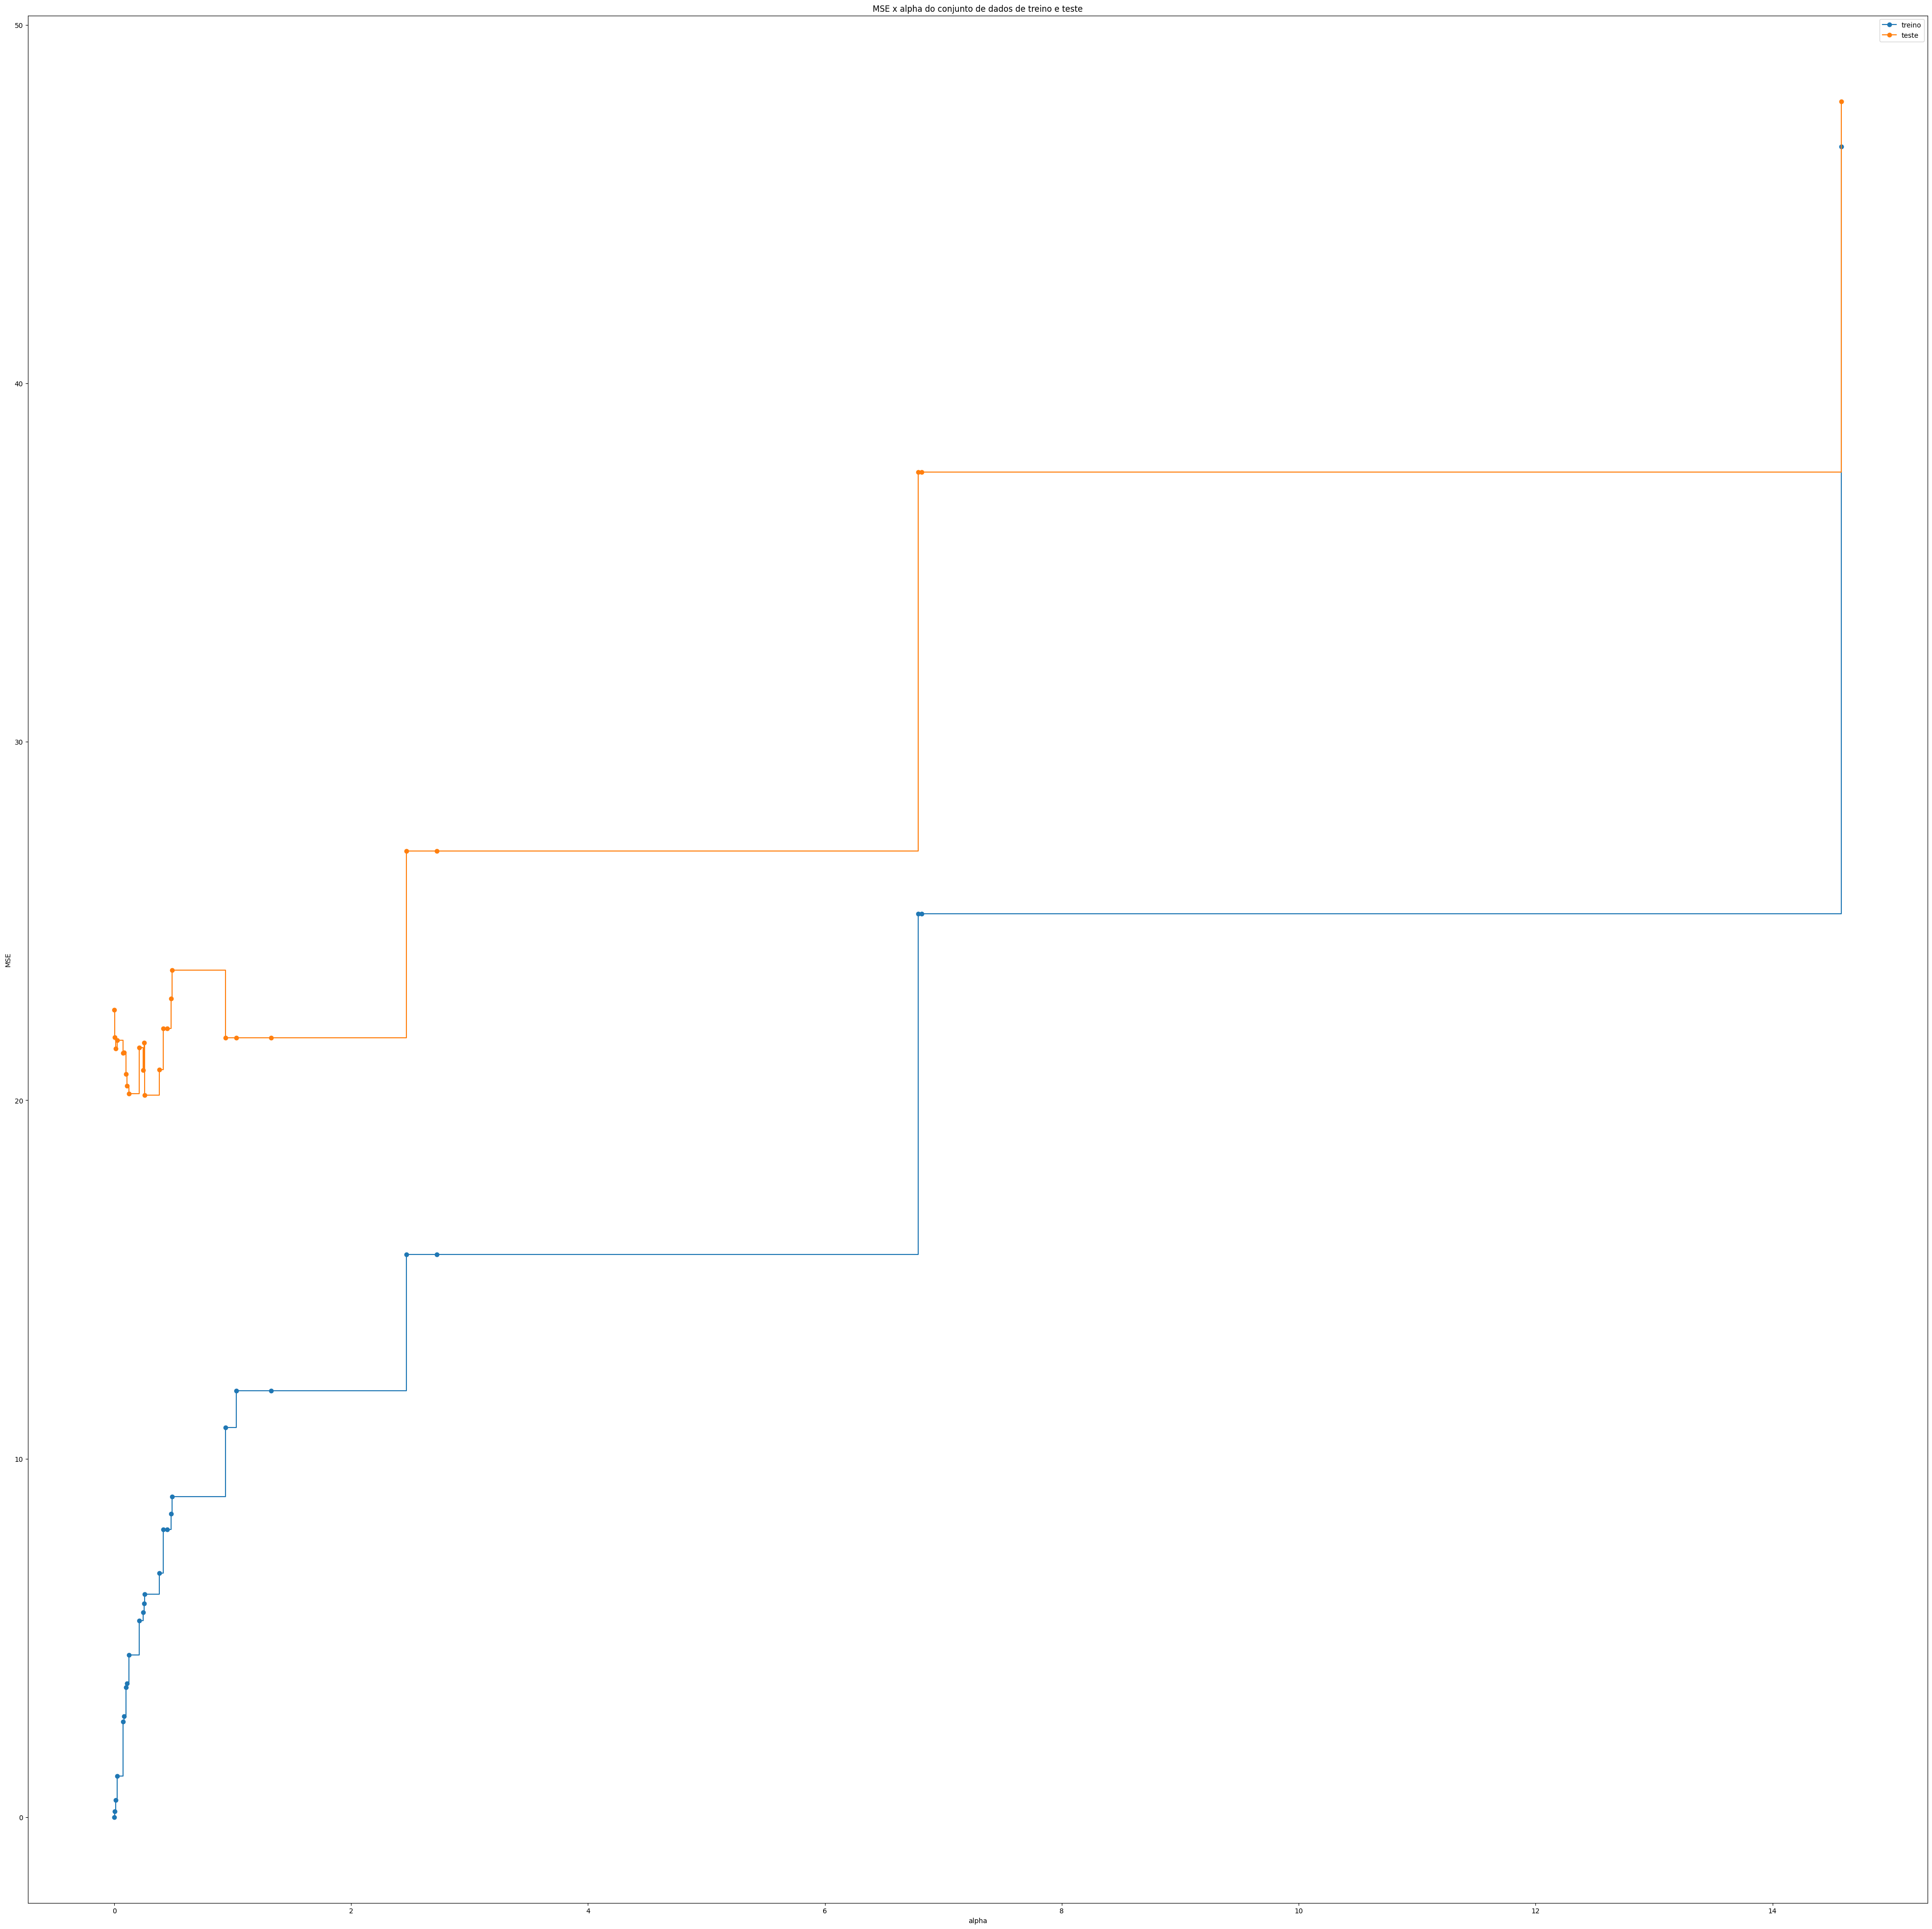

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

# alpha= 1.5; MSE= 18


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [20]:
final_tree = DecisionTreeRegressor(ccp_alpha = 1.5)
final_tree.fit(X_train, y_train)

r_quadrado1 = final_tree.score(X_train, y_train)
r_quadrado1

0.8468042229370074

### 7. Visualize esta árvore.

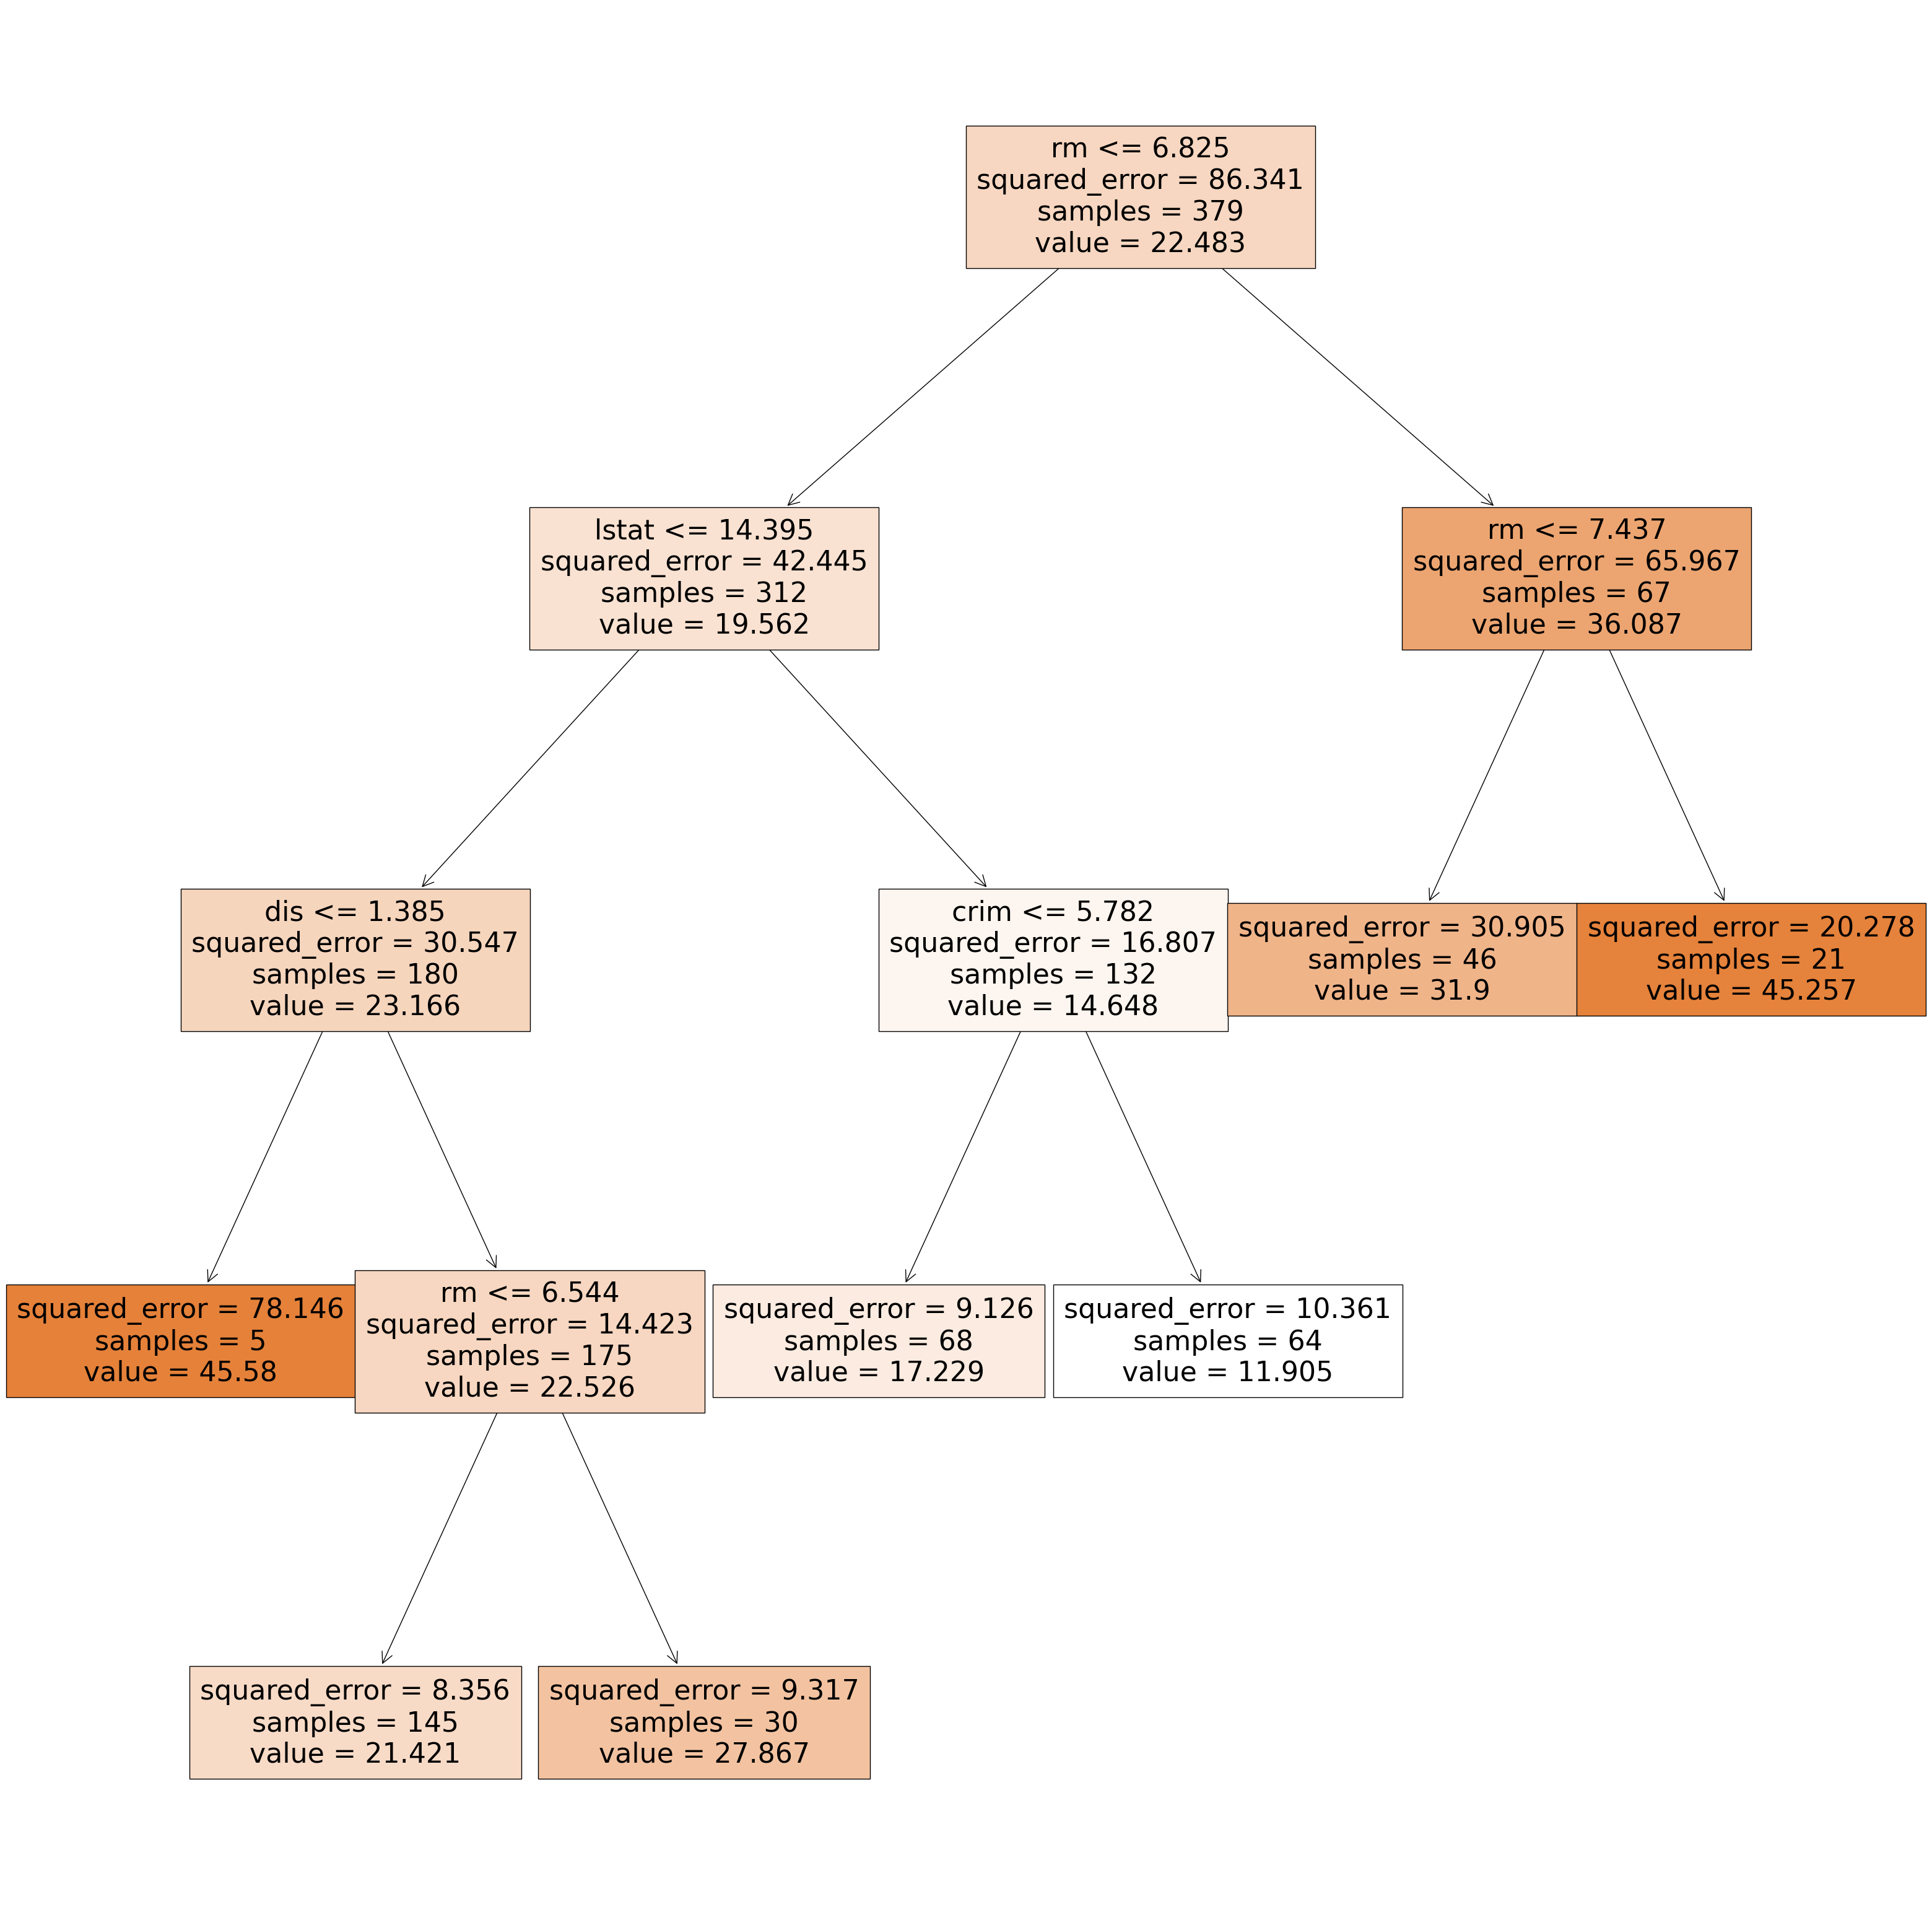

In [22]:
# Plotando a árvore final
plt.rc('figure', figsize=(40, 40))
tp = tree.plot_tree(final_tree,
                    feature_names=X.columns,
                    filled=True)
